# ES 335 - Prerequisite Test

In [3]:
import numpy as np
import time
import random
import jax.numpy as jnp
from jax import grad
import sympy
import matplotlib.pyplot as plt
import pandas as pd

## 1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Before answering - when additions are mentioned, I am assuming that **adding n numbers together means n-1 addition operations.** 
For example - 3+2+4 has 2 addition operations

Firstly, it is understood that the final matrix shall be of the order (n,m), and will have mn elements.
Let the (n,k) matrix be called A and (k,m) matrix be called B.
For the element in the ith row and jth columnm, we need to multiply each element of the ith row of A with the jth column of B.
This will involve exactly k multiplications, as A has a row that has k elements which has corresponding columns in B that have the same amount, k, elements.

Now, since there are m*n elements in the final matrix, the number of multiplications involved is thus - nmk.

For the case of addition, since k values (products of the rows of A and columns of B) are being added per element of the final matrix, there will be k-1 additions.
Thus, in all, there will be - nm(k-1) addition operations.

So the final answer is:

**Number of multiplications = nmk**

**Number of additions = nm(k-1)**

## 2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [7]:
#Question 2

#1. List of lists method
A = [[1,2,3],
     [4,5,6],
     [7,8,9]]
B = [[-3, -4, 2],
     [2, 3,5],
     [3,-4,0]]
C = [[0,0,0],
     [0,0,0],
     [0,0,0]]
#Here, m = n = k = 3
m,n,k = 3,3,3

start_time_1 = time.perf_counter()

for i in range(0,n):
    for j in range(0,m):
        C[i][j] = sum([B[j][x]* A[i][x] for x in range(0,k)])

end_time_1 = time.perf_counter()

time_taken = (end_time_1-start_time_1)*1000000

print(f"List in list result:\n{C}")
print(f"Time Taken: {time_taken} μs")

#2. Numpy method
A_np = np.array(A)
B_np = np.array(B)

start_time_2 = time.perf_counter()
C_np = A_np*B_np
end_time_2 = time.perf_counter()
time_taken = (end_time_2-start_time_2)*1000000

print(f"\nNumpy result:\n{C_np}")
print(f"Time Taken: {time_taken} μs")

List in list result:
[[-5, 23, -5], [-20, 53, -8], [-35, 83, -11]]
Time Taken: 176.00000137463212 μs

Numpy result:
[[ -3  -8   6]
 [  8  15  30]
 [ 21 -32   0]]
Time Taken: 807.2000055108219 μs


Clearly, numpy is much more efficient at matrix multiplication than simple list within list multiplication. This is becasue numpy arrays are stored as contnious segments in memory, whereas python lists are array pointers, which means they take up more space and time.

Also, since numpy has all data in one array as the same type, it doesn't have to waste time in type checking, while python has to check all elements for their type, even if they are all the same element. So numpy becomes more efficient

## 3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [10]:
#Question 3

#First Approach (looping n/2 times)

def first_method_median(arr):
    a = arr.copy()
    n = len(a)
    k = n // 2

    for _ in range(k - 1 if n % 2 == 0 else k):
        a.remove(min(a))

    if n % 2 == 1:
        return min(a)
    else:
        min1 = min(a)
        a.remove(min1)
        min2 = min(a)
        return 0.5 * (min1 + min2)
        
def binary_select(arr, k):
    if len(arr) == 1:
        return arr[0]
        
    pivot = random.choice(arr)
    
    lows = [l for l in arr if l < pivot]
    highs = [h for h in arr if h > pivot]
    pivots = [p for p in arr if p == pivot]

    if k < len(lows):
        return binary_select(lows, k)
    elif k < len(lows) + len(pivots):
        return pivot
    else:
        return binary_select(highs, k - len(lows) - len(pivots))

def new_median_method(arr):
    n = len(arr)
    if n % 2 == 1:
        return binary_select(arr, n // 2)
    else:
        left = binary_select(arr, n // 2 - 1)
        right = binary_select(arr, n // 2)
        return 0.5 * (left + right)

sizes = [1000, 5000, 10000]

for n in sizes:
    print(f"\nArray size: {n}")
    arr = random.sample(range(10*n), n)

    start = time.time()
    first_median = first_method_median(arr)
    print(f"Naive method median: {first_median:.2f} | Time: {time.time() - start:.4f}s")

    start = time.time()
    binary_median = new_median_method(arr)
    print(f"QuickSelect median: {binary_median:.2f} | Time: {time.time() - start:.4f}s")

    start = time.time()
    median_np = np.median(arr)
    print(f"Numpy median: {median_np:.2f} | Time: {time.time() - start:.6f}s")



Array size: 1000
Naive method median: 5123.00 | Time: 0.0160s
QuickSelect median: 5123.00 | Time: 0.0015s
Numpy median: 5123.00 | Time: 0.002460s

Array size: 5000
Naive method median: 25132.00 | Time: 0.4199s
QuickSelect median: 25132.00 | Time: 0.0084s
Numpy median: 25132.00 | Time: 0.001010s

Array size: 10000
Naive method median: 50390.50 | Time: 1.6642s
QuickSelect median: 50390.50 | Time: 0.0106s
Numpy median: 50390.50 | Time: 0.001095s


#### 1. Given Method:
Time Complexity would be equal to number of elements in the array times the number of times traversed.
Thus, the complexity would be O(nk), where k is the number of times traversed.
In the case of median, k = n//2.
Thus, complexity = O(n*n/2) = O(n**2)

#### 2. Binary Selection:

Explaination: First, we create a function that selects the kth biggest element in the list using a binary method. We split the list at a random pivot, and split the list at that pivot such that the elements less than the pivot are to the left and more than the pivot are to the right. Then, we compare and if the length of both is equal (or with multiple pivots), then we return the pivot, otherwise we conduct the process again with updated value of k and the side which had more number of elements. 
This way, the actual efficiency is made as n * log n
Thus, new time complexity = O(nlogn)

#### 3. Numpy Method:
Numpy also follows this method for calculating the median, but since it doesn't need to typecheck each time the array is looped through, it is more efficient. 

## 4. What is the gradient of the following function with respect to x and y?
$$
x^2 y + y^3 \sin(x)
$$

$$
\begin{aligned}
&\text{We have the function:} \\
&f(x, y) = x^2 y + y^3 \sin(x) \\
\\
&\text{So to get the gradient with respect to } x, \text{ we differentiate as follows:} \\
&\frac{\partial f}{\partial x} = 2xy + y^3 \cos(x) \\
\\
&\text{To get the gradient with respect to } y, \text{ we differentiate as follows:} \\
&\frac{\partial f}{\partial y} = x^2 + 3y^2 \sin(x) \\
\\
&\text{So the final gradients are:} \\
&\text{Gradient with respect to } x: \quad 2xy + y^3 \cos(x) \\
&\text{Gradient with respect to } y: \quad x^2 + 3y^2 \sin(x)
\end{aligned}
$$


## 5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [15]:
#Question 5

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Gradient from JAX function
grad_x = grad(f, argnums=0)  
grad_y = grad(f, argnums=1)  

np.random.seed(42)
x_vals = np.random.rand(5)
y_vals = np.random.rand(5)

for i in range(5):
    x = x_vals[i]
    y = y_vals[i]
    
    gx_jax = grad_x(x, y)
    gy_jax = grad_y(x, y)
    
    gx_manual = 2 * x * y + y**3 * np.cos(x)
    gy_manual = x**2 + 3 * y**2 * np.sin(x)

    print(f"Point {i+1}: ({x:.3f}, {y:.3f}):")
    print(f"JAX x gradient: {gx_jax:.5f} | Manual x gradient: {gx_manual:.5f}")
    print(f"JAX y gradient: {gy_jax:.5f} | Manual y gradient: {gy_manual:.5f}")
    print()


Point 1: (0.375, 0.156):
JAX x gradient: 0.12039 | Manual x gradient: 0.12039
JAX y gradient: 0.16699 | Manual y gradient: 0.16699

Point 2: (0.951, 0.058):
JAX x gradient: 0.11056 | Manual x gradient: 0.11056
JAX y gradient: 0.91209 | Manual y gradient: 0.91209

Point 3: (0.732, 0.866):
JAX x gradient: 1.75146 | Manual x gradient: 1.75146
JAX y gradient: 2.04014 | Manual y gradient: 2.04014

Point 4: (0.599, 0.601):
JAX x gradient: 0.89916 | Manual x gradient: 0.89916
JAX y gradient: 0.96927 | Manual y gradient: 0.96927

Point 5: (0.156, 0.708):
JAX x gradient: 0.57164 | Manual x gradient: 0.57164
JAX y gradient: 0.25806 | Manual y gradient: 0.25806



## 6. Use sympy to confirm that you obtain the same gradient analytically.

In [17]:
#Question 6

x, y = sympy.symbols('x y')

f = x**2 * y + y**3 * sympy.sin(x)

df_dx = sympy.diff(f, x)
df_dy = sympy.diff(f, y)

print("According to sympy:")
print("With respect to x:", df_dx)
print("With respect to y:", df_dy)

print("\nCaclulated derivatives:")
print("With respect to x: 2xy + (y^3)cos(x)")
print("With respect to y: x^2 + 3(y^2)sin(x)")

According to sympy:
With respect to x: 2*x*y + y**3*cos(x)
With respect to y: x**2 + 3*y**2*sin(x)

Caclulated derivatives:
With respect to x: 2xy + (y^3)cos(x)
With respect to y: x^2 + 3(y^2)sin(x)


## 7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [19]:
#Question 7
College = {
    2022: {
        'Computer Science and Engineering': {
            22110001: {'Name': 'Aarav', 'Marks': {'Maths': 95, 'English': 87, 'Physics': 91}},
            22110002: {'Name': 'Meera', 'Marks': {'Maths': 88, 'English': 80, 'Physics': 85}},
        },
        'Electrical Engineering': {
            22110003: {'Name': 'Vihaan', 'Marks': {'Maths': 78, 'English': 76, 'Physics': 74}},
        },
        'Mechanical Engineering': {},
        'Chemical Engineering': {
            22110004: {'Name': 'Anaya', 'Marks': {'Maths': 82, 'English': 79, 'Physics': 81}},
        },
        'Civil Engineering': {
            22110005: {'Name': 'Aditya', 'Marks': {'Maths': 91, 'English': 85, 'Physics': 90}},
        },
        'Materials Science and Engineering': {}
    },

    2023: {
        'Computer Science and Engineering': {},
        'Artificial Intelligence': {
            23110001: {'Name': 'Myra', 'Marks': {'Maths': 88, 'English': 82, 'Physics': 86}},
            23110002: {'Name': 'Krishna', 'Marks': {'Maths': 85, 'English': 89, 'Physics': 87}},
        },
        'Electrical Engineering': {
            23110003: {'Name': 'Sai', 'Marks': {'Maths': 76, 'English': 70, 'Physics': 73}},
        },
        'Mechanical Engineering': {
            23110004: {'Name': 'Vivaan', 'Marks': {'Maths': 93, 'English': 90, 'Physics': 94}},
        },
        'Chemical Engineering': {},
        'Civil Engineering': {},
        'Materials Science and Engineering': {
            23110005: {'Name': 'Ira', 'Marks': {'Maths': 81, 'English': 77, 'Physics': 79}},
        },
    },

    2024: {
        'Computer Science and Engineering': {
            24110001: {'Name': 'Siya', 'Marks': {'Maths': 87, 'English': 81, 'Physics': 85}},
        },
        'Artificial Intelligence': {
            24110002: {'Name': 'Arjun', 'Marks': {'Maths': 90, 'English': 84, 'Physics': 88}},
        },
        'Electrical Engineering': {
            24110003: {'Name': 'Avni', 'Marks': {'Maths': 86, 'English': 83, 'Physics': 87}},
        },
        'Integrated Circuit Design and Technology': {},
        'Mechanical Engineering': {
            24110004: {'Name': 'Sara', 'Marks': {'Maths': 79, 'English': 76, 'Physics': 80}},
            24110005: {'Name': 'Reyansh', 'Marks': {'Maths': 84, 'English': 78, 'Physics': 82}},
        },
        'Chemical Engineering': {},
        'Civil Engineering': {},
        'Materials Science and Engineering': {},
    },

    2025: {
        'Computer Science and Engineering': {
            25110001: {'Name': 'Anika', 'Marks': {'Maths': 91, 'English': 88, 'Physics': 90}},
        },
        'Artificial Intelligence': {
            25110002: {'Name': 'Ishaan', 'Marks': {'Maths': 92, 'English': 87, 'Physics': 89}},
        },
        'Electrical Engineering': {
            25110003: {'Name': 'Ayaan', 'Marks': {'Maths': 83, 'English': 81, 'Physics': 85}},
        },
        'Integrated Circuit Design and Technology': {
            25110004: {'Name': 'Diya', 'Marks': {'Maths': 77, 'English': 74, 'Physics': 78}},
        },
        'Mechanical Engineering': {},
        'Chemical Engineering': {},
        'Civil Engineering': {},
        'Materials Science and Engineering': {
            25110005: {'Name': 'Aadhya', 'Marks': {'Maths': 85, 'English': 80, 'Physics': 83}},
        },
    }
}


## 8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [21]:
#Questiion 8

class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __repr__(self):
        return f"Student(Roll: {self.roll_number}, Name: {self.name}, Marks: {self.marks})"

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch({self.name}, Total Students: {len(self.students)})"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year({self.year}, Branches: {self.branches})"

class College:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

    def __repr__(self):
        return f"Database(Years: {len(self.years)})"

IITGN = College()

year2022 = Year(2022)

cse_2022 = Branch("Computer Science and Engineering")

cse_2022.add_student(Student(22110001, "Aarav", {"Maths": 95, "English": 87, "Physics": 91}))

year2022.add_branch(cse_2022)

IITGN.add_year(year2022)

print(IITGN)
print(IITGN.years[0].branches[0].students[0])

#This is an example addition, more branches can be added using this method

Database(Years: 1)
Student(Roll: 22110001, Name: Aarav, Marks: {'Maths': 95, 'English': 87, 'Physics': 91})


## 9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
$$
\begin{aligned}
1.\quad & y = x \\
2.\quad & y = x^2 \\
3.\quad & y = \frac{x^3}{100} \\
4.\quad & y = \sin(x) \\
5.\quad & y = \frac{\sin(x)}{x} \\
6.\quad & y = \log(x) \\
7.\quad & y = e^x \\
\end{aligned}
$$

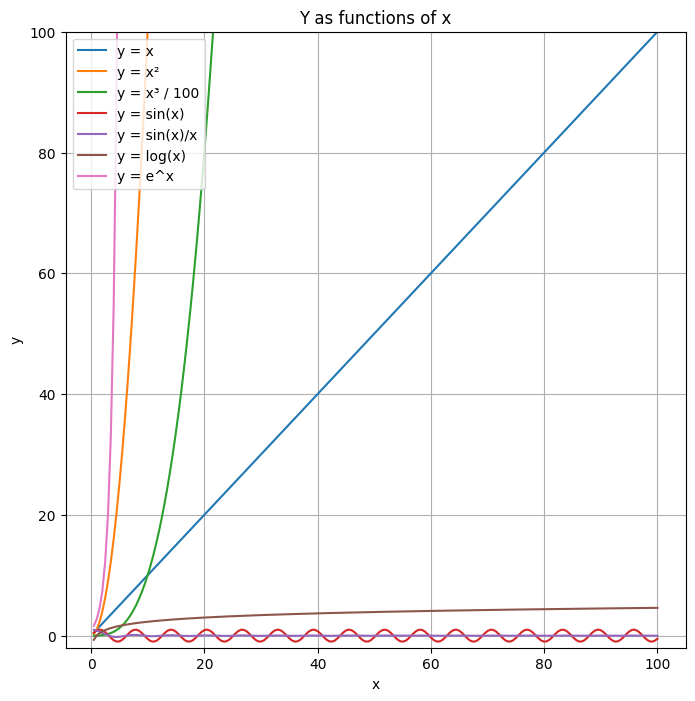

In [133]:
#Question 9

x = np.arange(0.5, 100.5, 0.5)
y1 = x
y2 = x**2
y3 = (x**3)/100
y4 = np.sin(x)
y5 = (np.sin(x))/x
y6 = np.log(x)
y7 = np.exp(x)

plt.figure(figsize=(8, 8))

plt.plot(x, y1, label='y = x')
plt.plot(x, y2, label='y = x²')
plt.plot(x, y3, label='y = x³ / 100')
plt.plot(x, y4, label='y = sin(x)')
plt.plot(x, y5, label='y = sin(x)/x')
plt.plot(x, y6, label='y = log(x)')
plt.plot(x, y7, label='y = e^x')

plt.title("Y as functions of x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.grid(True)
plt.ylim(-2, 100)

plt.show()

## 10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [48]:
#Question 10

rand_arr = np.random.uniform(1, 2, (20, 5))
df = pd.DataFrame(rand_arr)
df.columns = ['a', 'b', 'c', 'd', 'e']
print(df)
print()
std_dev_arr = df.std()
mean_arr = df.mean()
max_std = std_dev_arr.idxmax()
min_mean = mean_arr.idxmin()
print("Column with most standard deviation:", max_std, ":",std_dev_arr[max_std])
print("Column with least mean:", min_mean, ":",mean_arr[min_mean])

           a         b         c         d         e
0   1.289751  1.161221  1.929698  1.808120  1.633404
1   1.871461  1.803672  1.186570  1.892559  1.539342
2   1.807440  1.896091  1.318003  1.110052  1.227935
3   1.427108  1.818015  1.860731  1.006952  1.510747
4   1.417411  1.222108  1.119865  1.337615  1.942910
5   1.323203  1.518791  1.703019  1.363630  1.971782
6   1.962447  1.251782  1.497249  1.300878  1.284840
7   1.036887  1.609564  1.502679  1.051479  1.278646
8   1.908266  1.239562  1.144895  1.489453  1.985650
9   1.242055  1.672136  1.761620  1.237638  1.728216
10  1.367783  1.632306  1.633530  1.535775  1.090290
11  1.835302  1.320780  1.186519  1.040775  1.590893
12  1.677564  1.016588  1.512093  1.226496  1.645173
13  1.174366  1.690938  1.386735  1.936730  1.137521
14  1.341066  1.113474  1.924694  1.877339  1.257942
15  1.659984  1.817222  1.555201  1.529651  1.241852
16  1.093103  1.897216  1.900418  1.633101  1.339030
17  1.349210  1.725956  1.897110  1.887086  1.

## 11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [76]:
#Question 11

#Part 1 - Creating f
df['f'] = df['a'] + df['b'] + df['c'] + df['d'] + df['e']

#Part 2 - Creating g
df['g'] = np.array(["GT8" if x > 8 else "LT8" for x in df['f']])

#Part 3 - Number of columns with LT8
mask = df['g'] == "LT8"
ans = sum(mask)
print("The number of columns with value of g = LT8 is:", ans)

#Part 4 - Standard Deviation in f for both LT8 and GT8
mask_1 = mask
mask_2 = df['g'] == 'GT8'
lt8_arr = df[mask_1]['f']
gt8_arr = df[mask_2]['f']
lt8_std_dev = lt8_arr.std()
gt8_std_dev = gt8_arr.std()
print("Standard Deviation of f for LT8:", lt8_std_dev)
print("Standard Deviation of f for GT8:", gt8_std_dev)

The number of columns with value of g = LT8 is: 18
Standard Deviation of f for LT8: 0.5089089443622843
Standard Deviation of f for GT8: 0.24439980380313883


## 12. Write a small piece of code to explain broadcasting in numpy.

Broadcasting allows you to perform arithmetic operators between arrays with different shapes. What it does is it extends (or broadcasts) the shape of the smaller array onto the larger one, and then performs the element by element operation on that array.

So for example:

In [83]:
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
B = np.array([1,2,3])
print(A+B)

[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]]


As we can see, numpy automatically projected the size of A (3x3) onto B (1x3) to make them both the same size.

There are a few rules to broadcasting:

If the 2 arrays dont have the same dimension, then the one with lesser dimmension is padded with single dimensions to it's left until it matches the dimension of the larger array.
So for example, if you have 2 arrays with shapes: (2,4,3,4) and (3,4), then the second array is padded to (1,1,3,4).

Secondly, once all the arrays have same dimensions, if all axes have the same values or either one of them is 1, then broadcasting is allowed.
The final shape is thus the one with the maximum value between the 2 shapes per axis.

In [89]:
A = np.random.randint(0, 10, (2, 4, 3, 4))
B = np.random.randint(0, 10, (3, 4))

C = A + B

print("Shape of A:", A.shape)
print("Shape of B (original):", B.shape)
print("Shape of result C (A + B):", C.shape)

Shape of A: (2, 4, 3, 4)
Shape of B (original): (3, 4)
Shape of result C (A + B): (2, 4, 3, 4)


## 13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [131]:
#Question 13

def arg_min(arr):
    arr = arr.flatten()  
    min_val = arr[0]
    min_index = 0
    for i in range(1, len(arr)):
        if arr[i] < min_val:
            min_val = arr[i]
            min_index = i
    return min_index

a = np.random.randint(0, 10, (2, 3))

print("Original array:\n", a)
print("Index of minimum value (custom arg_min):", arg_min(a))
print("Index of minimum value (NumPy argmin):  ", a.argmin())

Original array:
 [[4 3 2]
 [2 3 8]]
Index of minimum value (custom arg_min): 2
Index of minimum value (NumPy argmin):   2
